In [1]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Extracting dataset from a ZIP archive
!unzip '/content/drive/MyDrive/FYP/fruits_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fruits_dataset/pitahaya/111.jpg  
  inflating: fruits_dataset/pitahaya/112.jpg  
  inflating: fruits_dataset/pitahaya/113.jpg  
  inflating: fruits_dataset/pitahaya/114.jpg  
  inflating: fruits_dataset/pitahaya/115.jpg  
  inflating: fruits_dataset/pitahaya/116.jpg  
  inflating: fruits_dataset/pitahaya/117.jpg  
  inflating: fruits_dataset/pitahaya/118.jpg  
  inflating: fruits_dataset/pitahaya/119.jpg  
  inflating: fruits_dataset/pitahaya/12.jpg  
  inflating: fruits_dataset/pitahaya/120.jpg  
  inflating: fruits_dataset/pitahaya/121.jpg  
  inflating: fruits_dataset/pitahaya/122.jpg  
  inflating: fruits_dataset/pitahaya/123.jpg  
  inflating: fruits_dataset/pitahaya/124.jpg  
  inflating: fruits_dataset/pitahaya/125.jpg  
  inflating: fruits_dataset/pitahaya/126.jpg  
  inflating: fruits_dataset/pitahaya/127.jpg  
  inflating: fruits_dataset/pitahaya/128.jpg  
  inflating: fruits_dataset/pitahaya/129.jpg  
  inflatin

In [3]:
#Importing the necessary libraries
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.image_utils import img_to_array, load_img

In [4]:
#Printing file names under the input directory
for dirname, _, filenames in os.walk('/content/fruits_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/fruits_dataset/blueberry/112.jpg
/content/fruits_dataset/blueberry/31.jpg
/content/fruits_dataset/blueberry/398.jpg
/content/fruits_dataset/blueberry/718.jpg
/content/fruits_dataset/blueberry/910.jpg
/content/fruits_dataset/blueberry/57.jpg
/content/fruits_dataset/blueberry/166.jpg
/content/fruits_dataset/blueberry/776.jpg
/content/fruits_dataset/blueberry/453.jpg
/content/fruits_dataset/blueberry/535.jpg
/content/fruits_dataset/blueberry/517.jpg
/content/fruits_dataset/blueberry/181.jpg
/content/fruits_dataset/blueberry/629.jpg
/content/fruits_dataset/blueberry/357.jpg
/content/fruits_dataset/blueberry/261.jpg
/content/fruits_dataset/blueberry/934.jpg
/content/fruits_dataset/blueberry/536.jpg
/content/fruits_dataset/blueberry/185.jpg
/content/fruits_dataset/blueberry/273.jpg
/content/fruits_dataset/blueberry/548.jpg
/content/fruits_dataset/blueberry/835.jpg
/content/fruits_dataset/blueberry/432.jpg
/content/fruits_dataset/blu

In [5]:
#Printing total number of files
count = 0
for root_dir, cur_dir, files in os.walk('/content/fruits_dataset'):
    count += len(files)
print('File count:', count)

File count: 23555


In [6]:
# Create a list with the filepaths for the dataset
dataset_dir = Path('/content/fruits_dataset')
filepaths = list(dataset_dir.glob(r'**/*.jpg'))

# Split the dataset into train, validation, and test sets
train_val_filepaths, test_filepaths = train_test_split(filepaths, test_size=0.10, random_state=42)
train_filepaths, val_filepaths = train_test_split(train_val_filepaths, test_size=0.1111111111, random_state=42) # 0.1111111111 x 0.9 = 0.10

In [7]:
def image_processing(filepath):
    #Create a DataFrame with the filepath and the labels of the pictures
    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)

    return df

In [8]:
# Process the train, validation, and test DataFrames
train_df = image_processing(train_filepaths)
val_df = image_processing(val_filepaths)
test_df = image_processing(test_filepaths)

In [9]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}')
print(f'Number of labels: {len(train_df.Label.unique())}')
print(f'Labels: {train_df.Label.unique()}')

print('\n-- Testing set --\n')
print(f'Number of pictures: {test_df.shape[0]}')
print(f'Number of labels: {len(test_df.Label.unique())}')
print(f'Labels: {test_df.Label.unique()}')

print('\n-- Validation set --\n')
print(f'Number of pictures: {val_df.shape[0]}')
print(f'Number of labels: {len(val_df.Label.unique())}')
print(f'Labels: {val_df.Label.unique()}')

-- Training set --

Number of pictures: 18843
Number of labels: 23
Labels: ['pomegranate' 'blueberry' 'mango' 'corn' 'orange' 'eggplant' 'lychee'
 'pitahaya' 'pineapple' 'carambola' 'lime' 'lemon' 'kiwi' 'tomato' 'dates'
 'strawberry' 'apple' 'watermelon' 'banana' 'apricot' 'coconut' 'pear'
 'guava']

-- Testing set --

Number of pictures: 2356
Number of labels: 23
Labels: ['guava' 'pitahaya' 'mango' 'apricot' 'blueberry' 'lemon' 'apple'
 'carambola' 'coconut' 'lychee' 'banana' 'corn' 'pineapple' 'pear'
 'pomegranate' 'orange' 'lime' 'tomato' 'kiwi' 'watermelon' 'dates'
 'eggplant' 'strawberry']

-- Validation set --

Number of pictures: 2356
Number of labels: 23
Labels: ['lemon' 'mango' 'blueberry' 'kiwi' 'lychee' 'eggplant' 'banana' 'apricot'
 'carambola' 'strawberry' 'dates' 'guava' 'coconut' 'corn' 'pitahaya'
 'watermelon' 'pomegranate' 'pineapple' 'apple' 'lime' 'orange' 'pear'
 'tomato']


In [10]:
train_df.head(5)

,Filepath,Label
0,/content/fruits_dataset/pomegranate/566.jpg,pomegranate
1,/content/fruits_dataset/blueberry/561.jpg,blueberry
2,/content/fruits_dataset/mango/557.jpg,mango
3,/content/fruits_dataset/corn/327.jpg,corn
4,/content/fruits_dataset/orange/122.jpg,orange


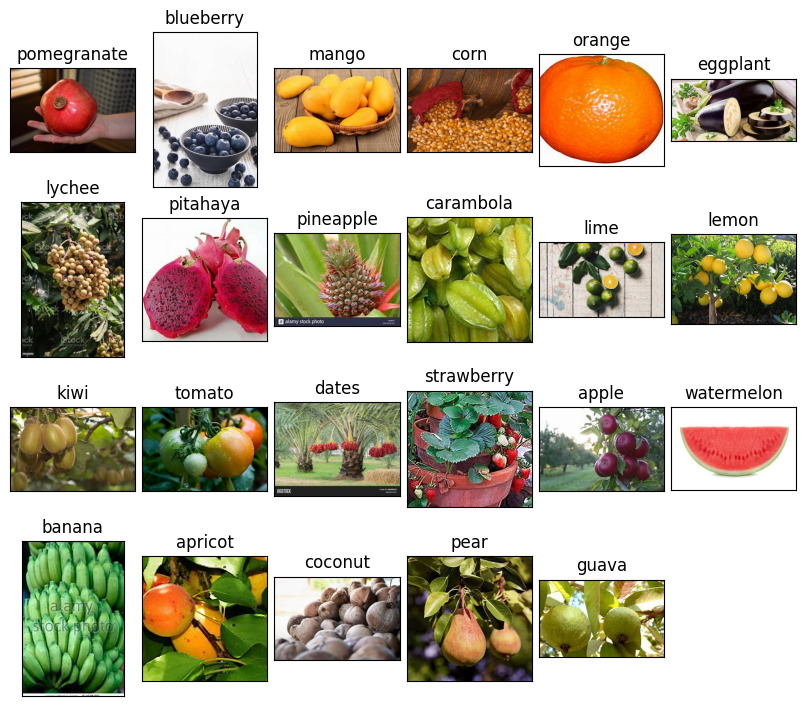

In [11]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(df_unique):
        ax.imshow(plt.imread(df_unique.Filepath[i]))
        ax.set_title(df_unique.Label[i], fontsize=12)
    else:
        ax.axis('off')  # Disable empty subplot if index exceeds DataFrame length

plt.tight_layout(pad=0.5)
plt.show()

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 18843 validated image filenames belonging to 23 classes.


In [14]:
val_images = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2356 validated image filenames belonging to 23 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2356 validated image filenames belonging to 23 classes.


In [16]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [17]:
inputs = base_model.input

x = tf.keras.layers.Dense(128, activation='relu')(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(23, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Getting the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
#Fitting the model
hist = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
589/589 [==============================] - 87s 129ms/step - loss: 0.6773 - accuracy: 0.7988 - val_loss: 0.4924 - val_accuracy: 0.8514
Epoch 2/5
589/589 [==============================] - 70s 119ms/step - loss: 0.3290 - accuracy: 0.8956 - val_loss: 0.4226 - val_accuracy: 0.8604
Epoch 3/5
589/589 [==============================] - 66s 111ms/step - loss: 0.2276 - accuracy: 0.9267 - val_loss: 0.4158 - val_accuracy: 0.8807
Epoch 4/5
589/589 [==============================] - 64s 109ms/step - loss: 0.1748 - accuracy: 0.9439 - val_loss: 0.4186 - val_accuracy: 0.8820
Epoch 5/5
589/589 [==============================] - 67s 113ms/step - loss: 0.1300 - accuracy: 0.9560 - val_loss: 0.4467 - val_accuracy: 0.8846


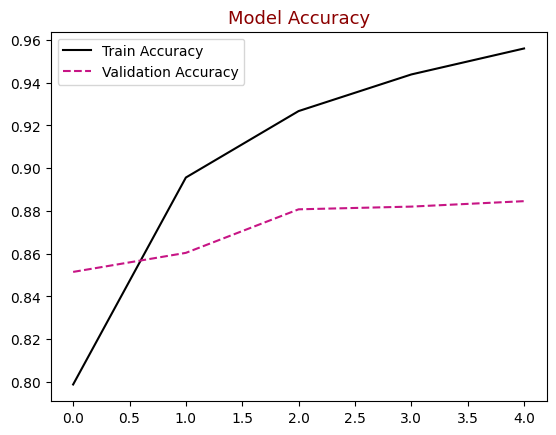

In [19]:
#Plotting the train and validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [20]:
test_df.head(5)

,Filepath,Label
0,/content/fruits_dataset/guava/966.jpg,guava
1,/content/fruits_dataset/pitahaya/235.jpg,pitahaya
2,/content/fruits_dataset/mango/87.jpg,mango
3,/content/fruits_dataset/pitahaya/533.jpg,pitahaya
4,/content/fruits_dataset/apricot/992.jpg,apricot


In [21]:
# Map the label indices to their respective class
labels = train_images.class_indices
labels = {v: k for k, v in labels.items()}

def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [22]:
# Predicting a test image
img = output('/content/fruits_dataset/guava/966.jpg')
print('Predicted Class Label:', img)

1/1 [==============================] - 4s 4s/step
Predicted Class Label: guava


In [23]:
#Displaying loss and accuracy of test data in percentage
loss, acc = model.evaluate(test_images)
loss_percentage = loss * 100
accuracy_percentage = acc * 100
print('Loss:', loss_percentage, '%')
print('Accuracy:', accuracy_percentage, '%')

74/74 [==============================] - 8s 107ms/step - loss: 0.3963 - accuracy: 0.8901
Loss: 39.625540375709534 %
Accuracy: 89.00679349899292 %


In [24]:
# Saving the model as h5 file
model.save('fruits_model.h5')